# Практическая работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 0381 Михайлов Виктор и Прохоров Борис. Вариант №8.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

* **Дискретный сигнал** $x_0, x_1, ..., x_{N-1}$:    
  Получается при дискретизации аналогового  сигнала $s(t)$.   
  Будем считать, что отcчёты $x_k, k = 0,1,...,N - 1$ дискретного сигнала получены в результаты равномерной дискретизации сигнала $s(t)$ с шагом дискретизации, равным единице:  $$x_k = s(t_k), k = 0, 1, ..., N - 1;$$ $$t_k - t_{k-1} = T, k = 1, ..., N - 1; T = 1.$$


* **Спектр дискретного сигнала**:  
  Представим дискретный сигнал как функцию от времени: $$s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - k)$$
  Тогда, пользуясь свойствами преобразования Фурье, спектр дискретного сигнала можно представить в виде периодической функции с периодом, равным $2\pi$: $$S(\omega) = \sum_{k=-\infty}^{\infty} x_k e^{-i\omega k}$$

* **Дискретное преобразование Фурье**:  
  Пусть последовательность отсчётов $\{x_k\}$ является периодической с периодом $N$: $$x_{k+N} = x_k \space\space\space\space\forall k$$
  Рассмотрим фрагмент последовательности из N отсчётов.  
  Например, $\{x_k: k = 0,1,2,...,N-1\}$. Тогда дискретная функция $$s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - kT)$$ тоже будет периодической, с периодом $NT$. Здесь $T$ - период дискретизации.  
  Спектр $s(t)$ также должен быть периодическим (с периодом $T = \frac{2\pi}{T}$) и дискретным с расстоянием между гармониками $\frac{2\pi}{NT}$.  
  Поскольку $s(t)$ периодическая функция, её можно разложить в ряд Фурье, коэффициенты которого вычисляются по следующей формуле: $$X(n) = \frac{1}{NT}\sum_{k=0}^{N-1} x_k e^{-i\frac{2\pi n}{N}k}, n = 0,1,2,...,N-1$$


## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Импорт необходимых библиотек:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

### 1-2. Сформируем дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(ω_kt+φ_k)$. Частота каждой из гармоник не должна превышать $π$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $π$, изменяющимися с шагом $Δω=0.1π$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $φ_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета $(N=31)$.  
###И визуализируем исходные аналоговый и дискретизированный сигналы.

In [ ]:
# Генерация аналогового сигнала
def signal(t):
  A = []
  W = [(x/10)*math.pi for x in range(0, 11, 1)]
  phi = []
  for i in range(10):
    A.append(random.randint(1, 11))
    phi.append(random.uniform(0, 0.5))

  res = np.linspace(0, 0, 256)
  for A_i, phi_i, w_i in zip(A, phi, W):
    res += A_i*np.cos(np.array(w_i*t) + phi_i)
  return res

In [ ]:
# Дискретизация
def discretization(s, N):
  res = []
  for t in N:
      res.append(s[int(t)*8])
  return res

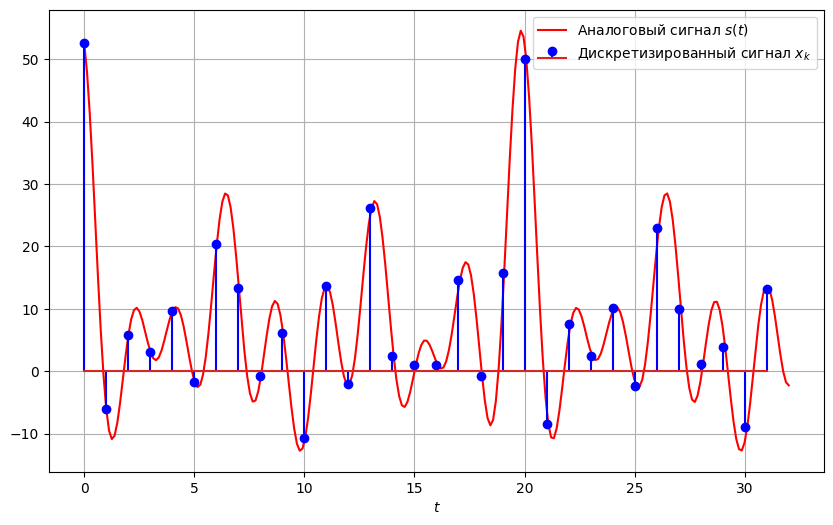

In [ ]:
analog_arg = np.linspace(0, 32, 256)

y = signal(analog_arg)

N_arg = np.linspace(0, 31, 32)
y_d = discretization(y, N_arg)

plt.figure(figsize=(10, 6))
plt.xlabel(r'$t$')
plt.grid()
plt.plot(analog_arg, y, 'red', label='Аналоговый сигнал $s(t)$')
plt.stem(N_arg, y_d, 'blue', label='Дискретизированный сигнал $x_k$')
plt.legend()
plt.show()

###3. С помощью ДПФ найдём дискретные отсчеты спектра дискретного сигнала и визуализируем их.

Представим дискретный сигнал в виде функции от времени:

$$
s(t)=\sum_{k=-\infty}^\infty x_k\delta(t-k)
$$

Пользуясь свойствами преобразования Фурье, спектр дискретного сигнала представим в виде:

$$
S(\omega)=\sum_{k=-\infty}^\infty x_ke^{-i\omega k}
$$

Визуализируем полученный с помощью дискретного преобразования Фурье спектр дискретного сигнала:

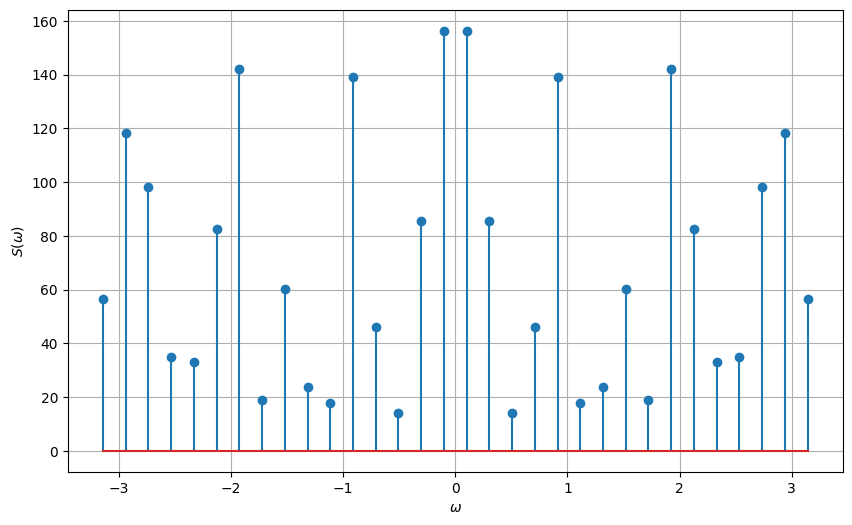

In [ ]:
w = np.linspace(-np.pi, np.pi, 32)

spectrum = lambda w, y: sum(y[i] * np.exp(-1j * w * i) for i in range(len(y)))

plt.figure(figsize=(10, 6))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S(\omega)$')
plt.stem(w, np.abs(spectrum(w, y_d)))
plt.grid()
plt.show()

###4-5. Для дискретного сигнала применим линейное сглаживание по 5-ти и 9-ти точкам, представим формулу для $H(ω)$ – передаточной функции (частотной характеристики) фильтра.
###И далее визуализируем полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

Сглаживание по 5-ти точкам:

####$y_n = \frac{s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}}{5}$

$H(\omega)=\frac{1+2cos(\omega)+2cos(2\omega)}{5}$

По 9-ти точкам:

####$y_n = \frac{s_{n-4}+s_{n-3}+s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}+s_{n+3}+s_{n+4}}{9}$

$H(\omega)=\frac{1+2cos(\omega)+2cos(2\omega)+2cos(3\omega)+2cos(4\omega)}{9}$

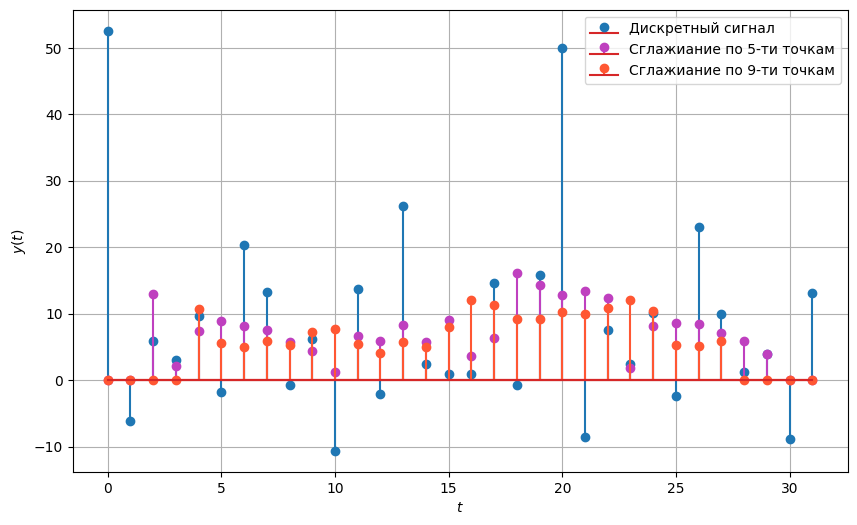

In [ ]:
smoothing_5 = lambda y: np.array([(y[i-2] + y[i-1] + y[i] + y[i+1] + y[i+2])/5 if 2 <= i < len(y)-2 else 0 for i in range(len(y))])

smoothing_9 = lambda y: np.array([(y[i-4] + y[i-3] + y[i-2] + y[i-1] + y[i] + y[i+4] + y[i+3] + y[i+2] + y[i+1])/9 if 4 <= i < len(y)-4 else 0 for i in range(len(y))])

plt.figure(figsize=(10, 6))
plt.ylabel('$y(t)$')
plt.xlabel('$t$')
plt.stem(N_arg, y_d, label="Дискретный сигнал")
plt.stem(N_arg, smoothing_5(y_d), label="Сглажиание по 5-ти точкам", linefmt='#BF40BF')
plt.stem(N_arg, smoothing_9(y_d), label="Сглажиание по 9-ти точкам", linefmt='#FF5733')
plt.legend()
plt.grid()
plt.show()

###6. С помощью ДПФ найдём дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализируем их совместно с отчетами спектра исходного дискретного сигнала.

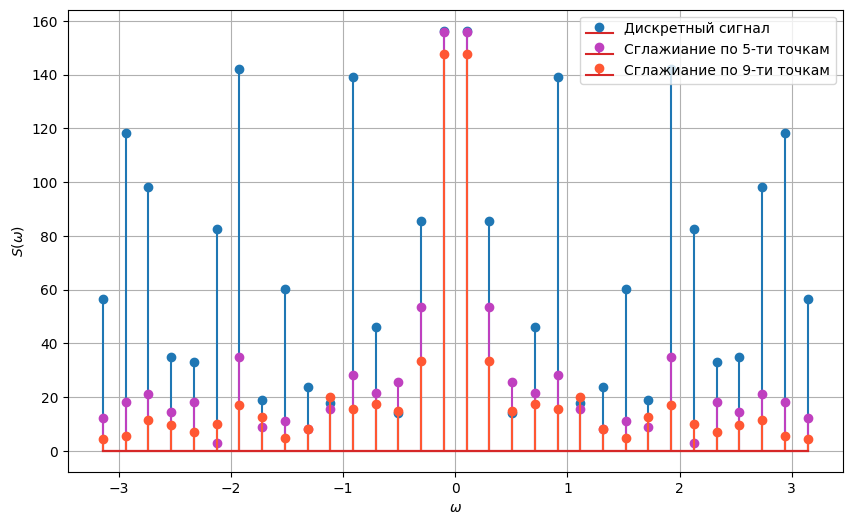

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S(\omega)$')
plt.stem(w, np.abs(spectrum(w, y_d)), label="Дискретный сигнал")
plt.stem(w, np.abs(spectrum(w, smoothing_5(y_d))), label="Сглажиание по 5-ти точкам", linefmt='#BF40BF')
plt.stem(w, np.abs(spectrum(w, smoothing_9(y_d))), label="Сглажиание по 9-ти точкам", linefmt='#FF5733')
plt.legend()
plt.grid()
plt.show()

###7. Проанализируем результат на соответствие значениям $H(ω)$.
На вышеприведённых графиках можно заметить, что чем больше точек используется при фильтрации, тем меньше полоса пропускания и тем быстрее падает амлитуда по мере роста частоты. Эти свойства согласуются со свойствами передаточных функций, установленными в третьей практической работе.

###8. Повторим п. 4–7 для следующих фильтров:
**a.Сглаживание полиномом 2-ой степени по 5 и 9 узлам.**

**b.Сглаживание полиномом 4-ой степени по 7 и 11 узлам.**

###Пункт 8a.
Сглаживание по 5-ти точкам:

####$y_n = \frac{-3s_{n-2} + 12s_{n-1} + 17s_{n} +12s_{n+1} - 3s_{n+2}}{35}$

$H(\omega) = \frac{17 + 24\cos\omega - 6\cos{2\omega}}{35}$

По 9-ти точкам:

####$y_n = \frac{-21s_{n-4} + 14s_{n-3} + 39s_{n-2} + 54s_{n-1} + 59s_n + 54s_{n+1} + 39s_{n+2} + 14s_{n+3} - 21s_{n+4}}{231}$

$H(\omega)=\frac{59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega)}{231}$

####a-4, 5)

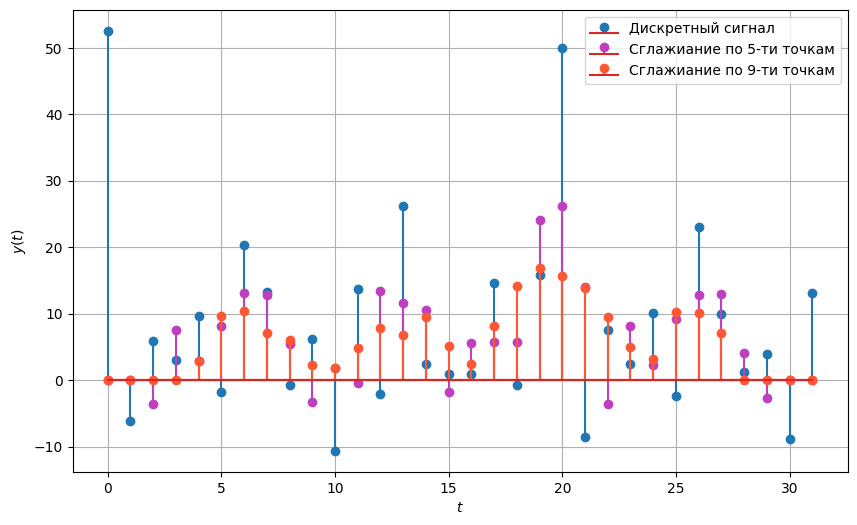

In [ ]:
smoothing2_5 = lambda y: np.array([(-3*y[i-2] + 12*y[i-1] + 17*y[i] + 12*y[i+1] - 3*y[i+2])/35 if 2 <= i < len(y)-2 else 0 for i in range(len(y))])

smoothing2_9 = lambda y: np.array(
    [(-21*y[i-4] + 14*y[i-3] + 39*y[i-2] + 54*y[i-1] + 59*y[i] + 54*y[i+1] + 39*y[i+2] + 14*y[i+3] - 21*y[i+4])/231 if 4 <= i < len(y)-4 else 0 for i in range(len(y))]
  )

plt.figure(figsize=(10, 6))
plt.ylabel('$y(t)$')
plt.xlabel('$t$')
plt.stem(N_arg, y_d, label="Дискретный сигнал")
plt.stem(N_arg, smoothing2_5(y_d), label="Сглажиание по 5-ти точкам", linefmt='#BF40BF')
plt.stem(N_arg, smoothing2_9(y_d), label="Сглажиание по 9-ти точкам", linefmt='#FF5733')
plt.legend()
plt.grid()
plt.show()

####a-6)

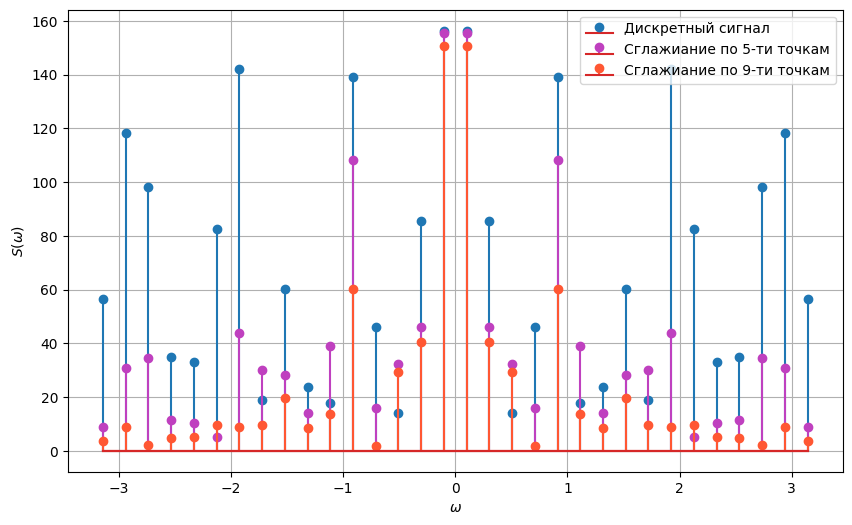

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S(\omega)$')
plt.stem(w, np.abs(spectrum(w, y_d)), label="Дискретный сигнал")
plt.stem(w, np.abs(spectrum(w, smoothing2_5(y_d))), label="Сглажиание по 5-ти точкам", linefmt='#BF40BF')
plt.stem(w, np.abs(spectrum(w, smoothing2_9(y_d))), label="Сглажиание по 9-ти точкам", linefmt='#FF5733')
plt.legend()
plt.grid()
plt.show()

####a-7)

По графикам можно установить те же свойства фильтра, что и в пунтке 7. Эти свойства соотвествуют передаточной функции фильтра.

###Пункт 8b.
Сглаживание по 7-и точкам:

####$y_n = \frac{5s_{n-3} - 30s_{n-2} + 75s_{n-1} + 131s_n + 75s_{n+1} - 30s_{n+2} + 5s_{n+3}}{231}$

$H(\omega) = \frac{131 + 150cos(\omega) - 60cos(2\omega) + 10cos(3\omega)}{231}$

По 11-ти точкам:

####$y_n = \frac{18s_{n-5} - 45s_{n-4} - 10s_{n-3} + 60s_{n-2} + 120s_{n-1} + 143s_n + 120s_{n+1} + 60s_{n+2} - 10s_{n+3} - 45s_{n+4} + 18s_{n+5}}{429}$

$H(\omega) = \frac{143 + 240 cos(\omega) + 120 cos(2\omega) − 20 cos(3\omega) - 90 cos(4\omega) + 36 cos(5\omega)}{429}$

####b-4, 5)

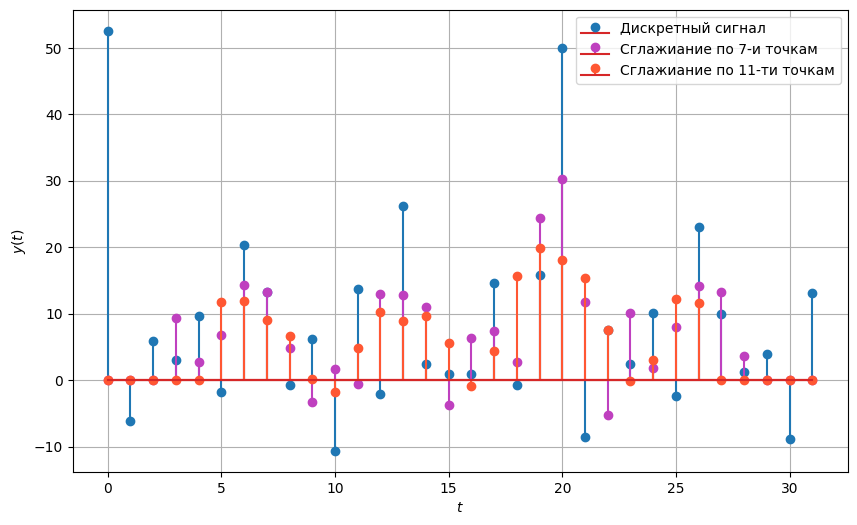

In [ ]:
smoothing4_7 = lambda y: np.array([(5*y[i-3]-30*y[i-2] + 75*y[i-1] + 131*y[i] + 75*y[i+1] - 30*y[i+2] + 5*y[i+3])/231 if 3 <= i < len(y)-3 else 0 for i in range(len(y))])

smoothing4_11 = lambda y: np.array([(18*y[i-5] - 45*y[i-4] - 10*y[i-3] + 60*y[i-2] + 120*y[i-1] + 143*y[i] + 18*y[i+5] - 45*y[i+4] + -10*y[i+3] + 60*y[i+2] + 120*y[i+1])/429 if 5 <= i < len(y)-5 else 0 for i in range(len(y))])

plt.figure(figsize=(10, 6))
plt.ylabel('$y(t)$')
plt.xlabel('$t$')
plt.stem(N_arg, y_d, label="Дискретный сигнал")
plt.stem(N_arg, smoothing4_7(y_d), label="Сглажиание по 7-и точкам", linefmt='#BF40BF')
plt.stem(N_arg, smoothing4_11(y_d), label="Сглажиание по 11-ти точкам", linefmt='#FF5733')
plt.legend()
plt.grid()
plt.show()

####b-6)

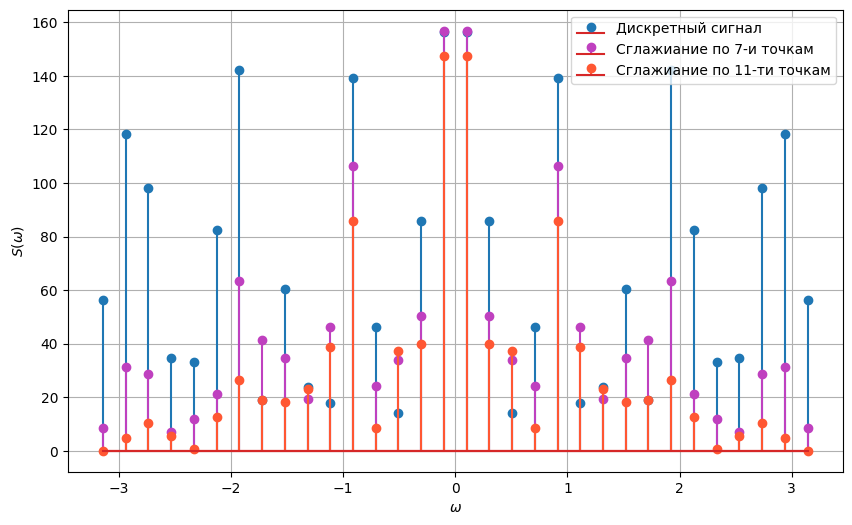

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S(\omega)$')
plt.stem(w, np.abs(spectrum(w, y_d)), label="Дискретный сигнал")
plt.stem(w, np.abs(spectrum(w, smoothing4_7(y_d))), label="Сглажиание по 7-и точкам", linefmt='#BF40BF')
plt.stem(w, np.abs(spectrum(w, smoothing4_11(y_d))), label="Сглажиание по 11-ти точкам", linefmt='#FF5733')
plt.legend()
plt.grid()
plt.show()

####b-7)

По графикам можно установить те же свойства фильтра, что и в пунтке 7. Эти свойства соотвествуют передаточной функции фильтра.


## Выводы

В ходе выполнения практической работы были получены практические навыки выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ). Для заданного дискретного сигнала были применены фильтры, основанные на сглаживании полиномами 1-й и 2-й степени по 5-ти и 9-ти точкам и 4-й степени по 7-ми и 11-ти точкам. Полученные после фильтрации дискретные сигналы совместно с исходным дискретным сигналом были визуализированны. Изменения в значениях отсчетов спектров были проанализированы с учетом характеристик передаточных функций соответствующих фильтров. В результате были выявлены аналогичные зависимости, связанные с выбором степени полинома для сглаживания и количеством использованных точек. С помощью ДПФ были найдены дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализированы совместно с отчетами спектра исходного дискретного сигнала.